In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip /content/gdrive/"MyDrive/Colab Notebooks/LHC Code/dataset-20210607T020316Z-001.zip"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/LHC Code/dataset-20210607T020316Z-001.zip
  inflating: dataset/posts_short.csv  
  inflating: dataset/postLinks.csv   
  inflating: dataset/postLinks.json  
  inflating: dataset/posts_long.csv  


In [4]:
import pandas as pd


In [5]:
dfpostsort = pd.read_csv("dataset/posts_long.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
dfpostsort

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,creation_date,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,community_owned_date,title,body
0,0,4,1,7,-999,2008-07-31T21:42:52.667,573,37080,8,<c#><floating-point><type-conversion><double><...,13,1,41,2012-10-31T16:42:47.213,Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...
1,1,6,1,31,-999,2008-07-31T22:08:08.620,256,16306,9,<html><css><css3><internet-explorer-7>,5,0,10,NaN,Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...
2,2,9,1,1404,-999,2008-07-31T23:40:59.743,1743,480476,1,<c#><.net><datetime>,64,7,399,2011-08-16T19:40:43.080,How do I calculate someone's age in C#?,<p>Given a <code>DateTime</code> representing ...
3,3,11,1,1248,-999,2008-07-31T23:55:37.967,1348,136033,1,<c#><datetime><time><datediff><relative-time-s...,35,3,529,2009-09-04T13:15:59.820,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...
4,4,13,1,-999,-999,2008-08-01T00:42:38.903,539,157009,9,<javascript><html><browser><timezone><timezone...,25,6,137,NaN,Determine a User's Timezone,<p>Is there any standard way for a Web Server ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676199,676199,52133457,1,-999,-999,2018-09-02T02:10:04.210,0,14,4101319,<python><import>,0,0,0,NaN,Odd behavior with importing in current directory,<p>This could be a duplicate dealing with circ...
676200,676200,52133674,1,-999,-999,2018-09-02T03:08:51.103,-3,16,9815281,<java><firebase><android-studio>,0,2,0,NaN,How can I fix this run time error in Android S...,<p>Error message</p>\n\n<pre><code>E/AndroidRu...
676201,676201,52133700,1,-999,-999,2018-09-02T03:15:42.997,0,23,4044009,<c>,0,1,0,NaN,How to Use Conditional Compilation in C,<p>I have the following:</p>\n\n<pre><code>#in...
676202,676202,52133880,1,-999,-999,2018-09-02T04:04:31.570,0,15,10271692,<angularjs><node.js><ajax>,1,1,0,NaN,Options is coming instead of put,<p>This is the front-end part</p>\n\n<pre><cod...


1. Determine the Number of Tags Per Question

In [7]:
dfpostsort['frequency'] = dfpostsort.tags.apply(lambda n: len(n.split('>')))
dfpostsort['frequency']=dfpostsort['frequency']-1

In [8]:
#1. Determine the Number of Tags Per Question
dfpostsort[['id','tags','frequency']]

,id,tags,frequency
0,4,<c#><floating-point><type-conversion><double><...,5
1,6,<html><css><css3><internet-explorer-7>,4
2,9,<c#><.net><datetime>,3
3,11,<c#><datetime><time><datediff><relative-time-s...,5
4,13,<javascript><html><browser><timezone><timezone...,5
...,...,...,...
676199,52133457,<python><import>,2
676200,52133674,<java><firebase><android-studio>,3
676201,52133700,<c>,1
676202,52133880,<angularjs><node.js><ajax>,3


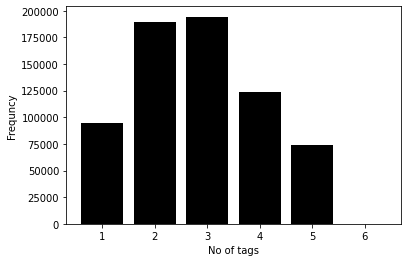

In [243]:
cntfrequency = {}
from matplotlib import pyplot as plt
for item in dfpostsort['frequency']:
   if item in cntfrequency:
      cntfrequency[item] += 1
   else:
      cntfrequency[item] = 1

totaltags = list(cntfrequency.keys())
frevalues = list(cntfrequency.values())
plt.bar(totaltags, frevalues, color ='black') 
plt.xlabel("No of tags")
plt.ylabel("Frequncy")
plt.show()

2. Determine the Total Number of Unique Tags

In [11]:
dfpreprocess=dfpostsort.tags.replace('\<','',regex=True)

In [12]:
dfpreprocess=dfpreprocess.replace('\>',' ',regex=True)

In [13]:
dfpreprocess

0         c# floating-point type-conversion double decimal 
1                        html css css3 internet-explorer-7 
2                                         c# .net datetime 
3             c# datetime time datediff relative-time-span 
4          javascript html browser timezone timezoneoffset 
                                ...                        
676199                                       python import 
676200                        java firebase android-studio 
676201                                                   c 
676202                              angularjs node.js ajax 
676203                                            php html 
Name: tags, Length: 676204, dtype: object

In [14]:
dfpreprocess.str.lower().str.split()

0         [c#, floating-point, type-conversion, double, ...
1                    [html, css, css3, internet-explorer-7]
2                                      [c#, .net, datetime]
3         [c#, datetime, time, datediff, relative-time-s...
4         [javascript, html, browser, timezone, timezone...
                                ...                        
676199                                     [python, import]
676200                     [java, firebase, android-studio]
676201                                                  [c]
676202                           [angularjs, node.js, ajax]
676203                                          [php, html]
Name: tags, Length: 676204, dtype: object

In [218]:
#2. Determine the Total Number of Unique Tags
results = set()
dfpreprocess.str.lower().str.split().apply(results.update)
print("Total Number of Unique Tags : ",results)

Total Number of Unique Tags :  {'numpy-dtype', 'tcpdump', 'onfocus', 'replay', 'chromakey', 'browser-state', 'maxdate', 'compute-capability', 'wsod', 'knockout-validation', 'import.io', 'web-deployment', 'base32', 'broken-links', 'absolute-path', 'directed-graph', 'null-pointer', 'm2m', 'parentviewcontroller', 'iboutlet', 'enum-flags', 'view-source', 'refer', 'ioports', 'stunnel', 'html-to-pdf', 'dining-philosopher', 'avrdude', 'browser-extension', 'folding', 'outlook-vba', 'permute', 'reactive-programming', 'mouseevent', 'port80', 'final', 'argument-unpacking', 'ghc-pkg', 'tablerowsorter', 'objective-c-literals', 'supercomputers', 'template-meta-programming', 'ussd', 'hql', 'bottle', 'ibm-rad', 'direct-labels', 'favorite', 'brokenimage', 'android-drawable', 'certificatestore', 'bcd', 'office365', 'zone', 'opengl', 'web-inf', 'time-limiting', 'emotion', 'opencv-mat', 'line-api', 'instant', 'maven-metadata', 'apache-tika', 'mutated', 'assertj', 'sqlexception', 'tapjoy', 'mediastreamsegm

In [220]:
uniquetags = pd.DataFrame(results, columns=['Unique Tags'])
uniquetags

,Unique Tags
0,numpy-dtype
1,tcpdump
2,onfocus
3,replay
4,chromakey
...,...
25305,dword
25306,swift-array
25307,multiple-inheritance
25308,polyglot


3. Determine the top-25 Tags appearing frequently

In [16]:
tagfre = dfpreprocess.str.split(expand=True).stack().value_counts()

In [17]:
tagfre.to_dict()

{'java': 94846,
 'javascript': 81346,
 'php': 65333,
 'c#': 61899,
 'python': 61505,
 'c++': 40158,
 'android': 39910,
 'html': 33736,
 'jquery': 32601,
 'mysql': 24765,
 'css': 23161,
 'c': 22166,
 'ios': 21583,
 'arrays': 19867,
 'r': 19744,
 'sql': 17227,
 '.net': 14290,
 'regex': 14107,
 'string': 13397,
 'objective-c': 12949,
 'swift': 11197,
 'json': 10705,
 'iphone': 9295,
 'asp.net': 8276,
 'sql-server': 8165,
 'bash': 8074,
 'python-3.x': 7888,
 'node.js': 7135,
 'linux': 6944,
 'list': 6792,
 'ajax': 6696,
 'xml': 5981,
 'ruby': 5659,
 'asp.net-mvc': 5281,
 'multithreading': 5245,
 'swing': 5236,
 'function': 5191,
 'windows': 5124,
 'database': 5045,
 'date': 5010,
 'mongodb': 4958,
 'angularjs': 4955,
 'html5': 4855,
 'xcode': 4847,
 'css3': 4629,
 'matlab': 4615,
 'pandas': 4600,
 'python-2.7': 4580,
 'eclipse': 4570,
 'wpf': 4539,
 'git': 4458,
 'algorithm': 4457,
 'winforms': 4421,
 'shell': 4332,
 'class': 4222,
 'excel': 4184,
 'c++11': 4138,
 'oracle': 4099,
 'ruby-on

In [261]:
#3. Determine the top-25 Tags appearing frequently
toptags = pd.DataFrame(tagfre.items(), columns=['Tags', 'Frequency'])
to25 = toptags.nlargest(25, ['Frequency'])


In [262]:
to25['Tags']

0            java
1      javascript
2             php
3              c#
4          python
5             c++
6         android
7            html
8          jquery
9           mysql
10            css
11              c
12            ios
13         arrays
14              r
15            sql
16           .net
17          regex
18         string
19    objective-c
20          swift
21           json
22         iphone
23        asp.net
24     sql-server
Name: Tags, dtype: object

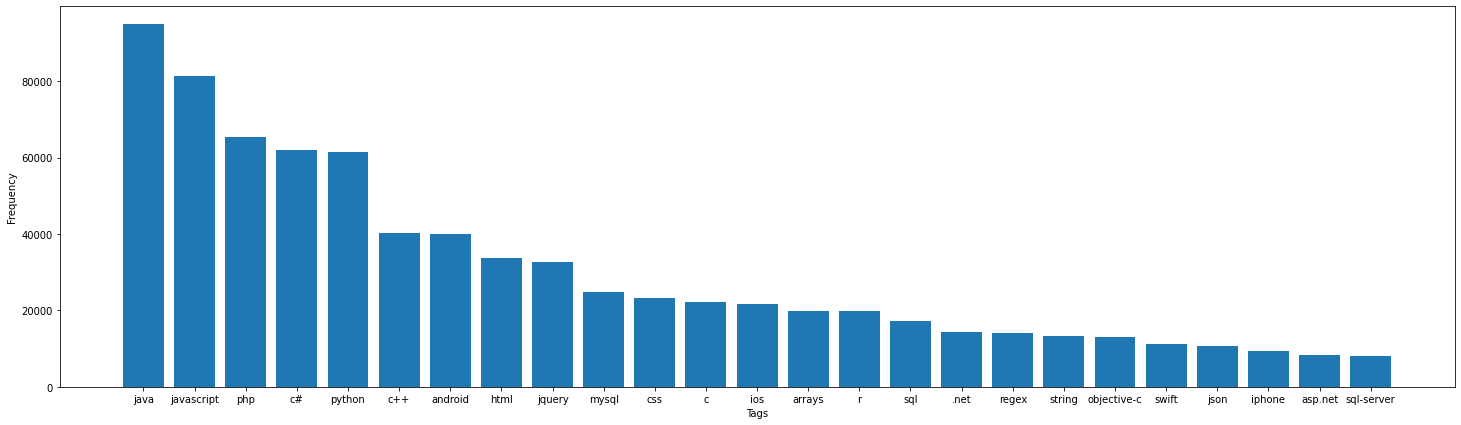

In [263]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25, 7))

plt.bar(to25['Tags'],to25['Frequency'])
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.show()

4. Determine the nature of the distribution of top-500 tags

In [221]:
#4
distribution = toptags.nlargest(500, ['Frequency'])

In [222]:
distribution

,Tags,Frequency
0,java,94846
1,javascript,81346
2,php,65333
3,c#,61899
4,python,61505
...,...,...
495,preg-match,438
496,background,437
497,itext,437
498,byte,436


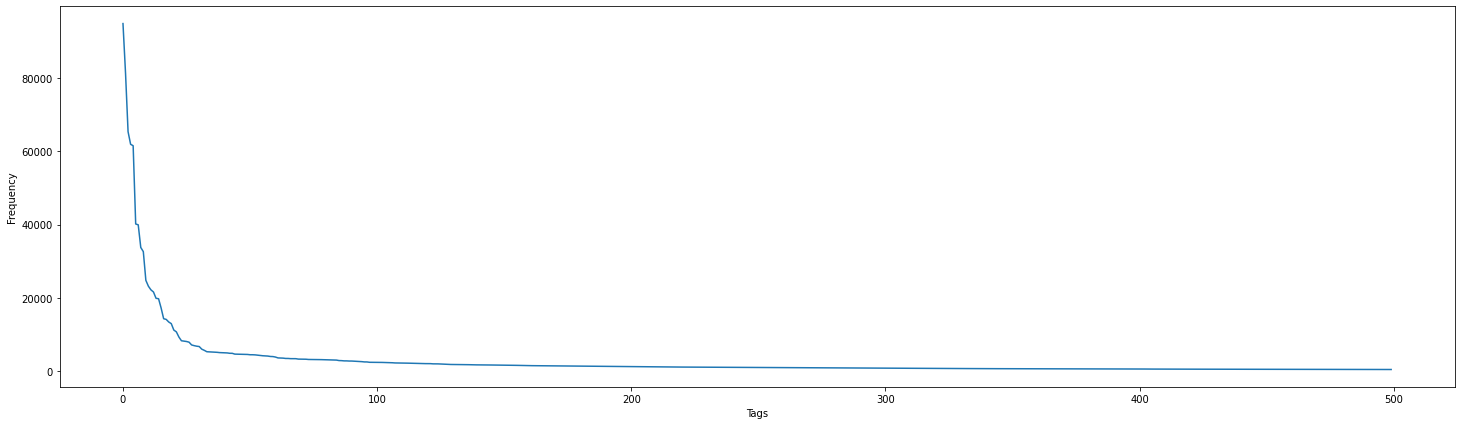

In [250]:
import numpy as np
tagslabel =np.arange(0, 500)
frequencylabel =distribution['Frequency'] 
plt.figure(figsize=(25, 7))
plt.plot(tagslabel,frequencylabel)
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.show()

5. Determine the ratio of duplicate questions asked in each month

In [22]:
import pandas
import random

filename = "dataset/postLinks.csv"

df = pandas.read_csv(filename)

In [23]:
start_date = '2008-01-01'
end_date = '2018-12-31'


In [24]:
mask = (df.creation_date > start_date) & (df.creation_date <= end_date)

In [25]:
df = df.loc[mask]
df

,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id
0,0,19,2010-04-26T02:59:48.130,109,32412,1
1,1,37,2010-04-26T02:59:48.600,1970,617600,1
2,2,42,2010-04-26T02:59:48.647,2154,2451138,1
3,3,48,2010-04-26T02:59:48.740,2483,496096,1
4,4,52,2010-04-26T02:59:48.757,2572,209329,1
...,...,...,...,...,...,...
5292619,5292619,1624278139,2018-09-02T08:09:41.520,52133002,31486547,1
5292620,5292620,1624278147,2018-09-02T08:10:50.820,52134991,5500805,1
5292621,5292621,1624278315,2018-09-02T08:14:26.470,52135049,30461565,1
5292622,5292622,1624278337,2018-09-02T08:15:36.387,52135007,1761051,1


In [152]:
dubliquetion = df.loc[df.link_type_id == 3]
nondubliquetion = df.loc[df.link_type_id == 1]

In [226]:

nondubliquetion

,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id
0,0,19,2010-04-26T02:59:48.130,109,32412,1
1,1,37,2010-04-26T02:59:48.600,1970,617600,1
2,2,42,2010-04-26T02:59:48.647,2154,2451138,1
3,3,48,2010-04-26T02:59:48.740,2483,496096,1
4,4,52,2010-04-26T02:59:48.757,2572,209329,1
...,...,...,...,...,...,...
5292619,5292619,1624278139,2018-09-02T08:09:41.520,52133002,31486547,1
5292620,5292620,1624278147,2018-09-02T08:10:50.820,52134991,5500805,1
5292621,5292621,1624278315,2018-09-02T08:14:26.470,52135049,30461565,1
5292622,5292622,1624278337,2018-09-02T08:15:36.387,52135007,1761051,1


In [227]:
dubliquetion

,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id
872126,872126,749670241,2013-02-18T03:03:16.917,70714,355934,3
872127,872127,749670246,2013-02-18T03:03:16.917,86947,73713,3
872128,872128,749670247,2013-02-18T03:03:16.917,97679,85122,3
872129,872129,749670248,2013-02-18T03:03:16.917,99408,1711,3
872130,872130,749670249,2013-02-18T03:03:16.917,26925,8127,3
...,...,...,...,...,...,...
5292603,5292603,1624277481,2018-09-02T07:56:44.970,52135030,43523564,3
5292611,5292611,1624277868,2018-09-02T08:04:16.750,52134533,1376640,3
5292612,5292612,1624277880,2018-09-02T08:04:35.903,52129921,14622421,3
5292616,5292616,1624278052,2018-09-02T08:07:28.340,52134484,1687620,3


In [155]:
dr = pd.DataFrame(dubliquetion.creation_date.values.astype('datetime64[M]'),columns = ['date'])
dr['date'] = pd.to_datetime(dr['date'])
ndr = pd.DataFrame(nondubliquetion.creation_date.values.astype('datetime64[M]'),columns = ['date'])
ndr['date'] = pd.to_datetime(ndr['date'])

#duplicatequedf.sort_values(by='Month')
dr['date'] = dr['date'].dt.strftime('%Y-%m')
ndr['date'] = ndr['date'].dt.strftime('%Y-%m')

In [156]:
ndr

,date
0,2010-04
1,2010-04
2,2010-04
3,2010-04
4,2010-04
...,...
4610290,2018-09
4610291,2018-09
4610292,2018-09
4610293,2018-09


In [157]:
drcnt = dr['date'].value_counts()
ndrcnt = ndr['date'].value_counts()

In [158]:
ndrcnt

2017-03    68739
2016-03    67319
2016-05    66052
2016-04    65832
2017-08    65240
           ...  
2010-09    12160
2010-11    11271
2010-06     9970
2010-05     9694
2018-09     1322
Name: date, Length: 102, dtype: int64

In [228]:
duplicateque = drcnt.to_dict()
duplicatequedf = pd.DataFrame(duplicateque.items(), columns=['Month', 'Duplicate Questions'])
non_duplicateque = ndrcnt.to_dict()
non_duplicatequedf = pd.DataFrame(non_duplicateque.items(), columns=['Month2', 'Non Duplicate Questions'])

non_duplicatequedf
#duplicatequedf['Month'] = pd.to_datetime(duplicatequedf['Month'])


#duplicatequedf.sort_values(by='Month')
monthlist = duplicatequedf['Month'].tolist()
quetionsfre = duplicatequedf['Duplicate Questions'].tolist()
#duplicatequedf=duplicatequedf.set_index('Month')
#duplicatequedf.reset_index(drop=True, inplace=True)

In [233]:
duplicatequedf

,Month,Duplicate Questions
0,2013-02,75344
1,2018-03,15366
2,2017-11,15055
3,2018-01,14569
4,2017-10,14116
...,...,...
63,2014-01,4101
64,2013-10,3533
65,2013-09,3467
66,2013-11,3170


In [237]:
mergedf=pd.merge(duplicatequedf,non_duplicatequedf,left_on='Month',right_on='Month2')

month_frelist1 = mergedf['Duplicate Questions'].tolist()
month_frelist2 = mergedf['Non Duplicate Questions'].tolist()

res = [i / j for i, j in zip(month_frelist1, month_frelist2)]
  
# printing result
print ("Ratio: " + str(res))

Ratio: [2.105875118788082, 0.23745576486223363, 0.24584809837189933, 0.24245702208390887, 0.23009340005542062, 0.23265116433467775, 0.24280411793542966, 0.22667671933390152, 0.206023911710607, 0.23278557531962202, 0.22740639425542827, 0.21975522398193886, 0.18426220922620345, 0.195087042424431, 0.23352309846010266, 0.22272604588394063, 0.19477859838101075, 0.18098848638023027, 0.17793660370353181, 0.1856647997669073, 0.17477976497832856, 0.16879329201604082, 0.18079749702608894, 0.1764829753458386, 0.16441591473384606, 0.18527844870411292, 0.1768243719375297, 0.17284153995683904, 0.16419687333563082, 0.15563213951484722, 0.16687700223279292, 0.172275255820342, 0.15540753835469412, 0.16323371028540656, 0.16527516566185646, 0.14834205933682373, 0.15579236851151598, 0.14612895195419467, 0.14373475003028363, 0.13458560560156196, 0.13668348608107644, 0.13234508547008547, 0.12934001670843775, 0.12301701759446207, 0.14675952795511704, 0.13108554098653108, 0.13265629958743255, 0.11793424229512

In [140]:
#duplicatequedfdict=duplicatequedf.to_dict()
monthlist

['2013-02',
 '2018-03',
 '2017-11',
 '2018-01',
 '2017-10',
 '2018-04',
 '2018-02',
 '2018-05',
 '2017-08',
 '2018-07',
 '2018-08',
 '2017-09',
 '2017-03',
 '2017-07',
 '2017-12',
 '2018-06',
 '2017-06',
 '2017-05',
 '2016-06',
 '2017-04',
 '2017-01',
 '2016-04',
 '2016-10',
 '2016-11',
 '2016-05',
 '2014-03',
 '2017-02',
 '2016-09',
 '2016-08',
 '2016-03',
 '2016-07',
 '2016-12',
 '2016-02',
 '2015-12',
 '2014-05',
 '2016-01',
 '2015-11',
 '2015-10',
 '2015-09',
 '2015-05',
 '2015-08',
 '2015-06',
 '2015-04',
 '2015-07',
 '2014-06',
 '2014-07',
 '2014-09',
 '2015-03',
 '2014-10',
 '2014-04',
 '2015-01',
 '2014-08',
 '2014-12',
 '2013-03',
 '2014-02',
 '2014-11',
 '2015-02',
 '2013-04',
 '2013-12',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2014-01',
 '2013-10',
 '2013-09',
 '2013-11',
 '2018-09']

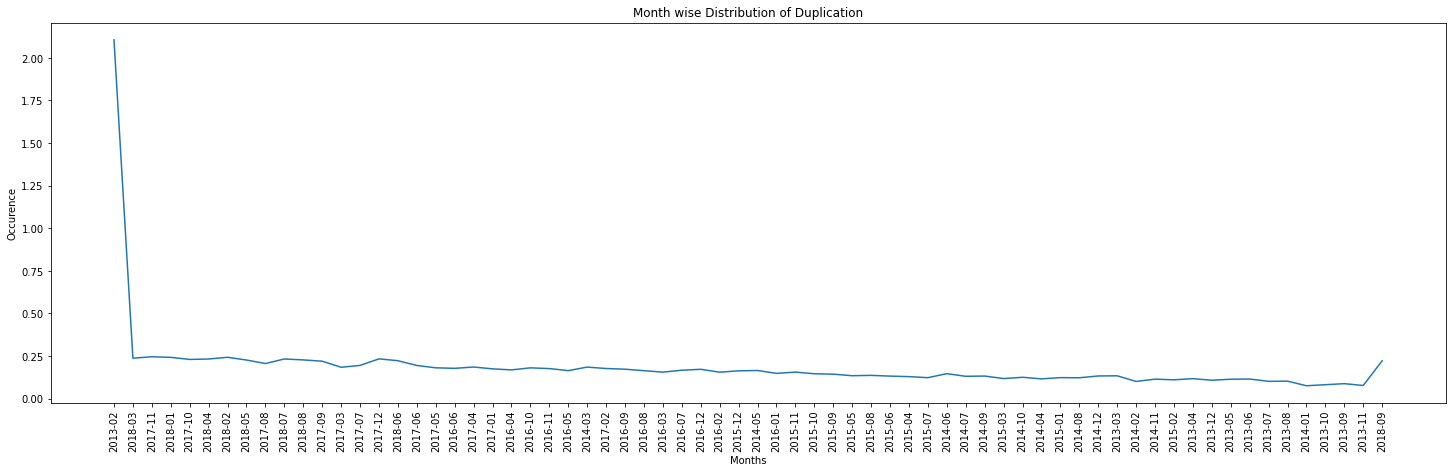

In [239]:
x=monthlist
y=res
plt.figure(figsize=(25, 7))
plt.plot(x,y)
plt.xlabel("Months")
plt.ylabel("Occurence")
plt.title("Month wise Distribution of Duplication")

plt.xticks(x, rotation ='vertical')

plt.show()

 6. Determine the percentage of duplicate questions associated with different tags

In [31]:
#6 Determine the percentage of duplicate questions associated with different tags
dubliquetion

,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id
872126,872126,749670241,2013-02-18T03:03:16.917,70714,355934,3
872127,872127,749670246,2013-02-18T03:03:16.917,86947,73713,3
872128,872128,749670247,2013-02-18T03:03:16.917,97679,85122,3
872129,872129,749670248,2013-02-18T03:03:16.917,99408,1711,3
872130,872130,749670249,2013-02-18T03:03:16.917,26925,8127,3
...,...,...,...,...,...,...
5292603,5292603,1624277481,2018-09-02T07:56:44.970,52135030,43523564,3
5292611,5292611,1624277868,2018-09-02T08:04:16.750,52134533,1376640,3
5292612,5292612,1624277880,2018-09-02T08:04:35.903,52129921,14622421,3
5292616,5292616,1624278052,2018-09-02T08:07:28.340,52134484,1687620,3


In [162]:
#Join Two dataframe
#joindf =pd.merge(dubliquetion,dfpostsort,on='id',how='inner')
joindf=pd.merge(dubliquetion,dfpostsort,left_on='post_id',right_on='id')

In [163]:
joindf

,Unnamed: 0_x,id_x,creation_date_x,post_id,related_post_id,link_type_id,Unnamed: 0_y,id_y,post_type_id,accepted_answer_id,...,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,community_owned_date,title,body,frequency
0,872127,749670246,2013-02-18T03:03:16.917,86947,73713,3,1835,86947,1,-999,...,10456,5056,<c#><operator-overloading><equals>,7,1,2,NaN,Best way to handle null when writing equals op...,<blockquote>\n <p><strong>Possible Duplicate:...,3
1,872130,749670249,2013-02-18T03:03:16.917,26925,8127,3,605,26925,1,-999,...,5485,1638,<cruisecontrol.net><cruisecontrol>,4,0,2,NaN,How do I delete a directory with cc.net / crui...,<blockquote>\n <p><strong>Possible Duplicate:...,2
2,872132,749670251,2013-02-18T03:03:16.917,81150,48935,3,1734,81150,1,-999,...,31308,-999,<c#><global><hotkeys>,3,2,14,NaN,Best way to tackle global hotkey processing in...,<blockquote>\n <p><strong>Possible Duplicate:...,3
3,872133,749670252,2013-02-18T03:03:16.917,110362,1854,3,2246,110362,1,110829,...,170947,115,<python><cross-platform>,5,0,39,NaN,How can I find the current OS in Python?,<blockquote>\n <p><strong>Possible Duplicate:...,2
4,872134,749670253,2013-02-18T03:03:16.917,117348,506368,3,2380,117348,1,117374,...,6756,3403,<c#><.net><xml-serialization><attributes>,2,0,1,NaN,Can you force the serialization of an enum val...,<blockquote>\n <p><strong>Possible Duplicate:...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431148,5292526,1624273560,2018-09-02T06:15:29.433,52134121,4261133,3,676203,52134121,1,-999,...,12,10049938,<php><html>,2,1,0,NaN,What's the problem in my php coding? [saving i...,"<p>Well, I want to save images that user uploa...",2
431149,5292540,1624274038,2018-09-02T06:28:14.333,52011078,35493681,3,673947,52011078,1,-999,...,17,10088620,<c#><httpwebrequest><webbrowser-control>,1,0,0,NaN,Auto scroll down web browser in C# winforms pr...,<p>I need to autoscroll webbrowser automatical...,3
431150,5292557,1624275479,2018-09-02T07:02:23.330,50351746,28702960,3,647834,50351746,1,50351811,...,63,5868293,<r><filter><data.table>,2,0,1,NaN,Filter a datatable based on another datatable,<p>I have the following <code>data.table</code...,3
431151,5292558,1624275480,2018-09-02T07:02:23.330,50351746,48592437,3,647834,50351746,1,50351811,...,63,5868293,<r><filter><data.table>,2,0,1,NaN,Filter a datatable based on another datatable,<p>I have the following <code>data.table</code...,3


In [204]:
top20=toptags.nlargest(21, ['Frequency'])
top20list = top20.Tags.tolist()
top20listfre =top20.Frequency.tolist()

In [205]:
top20list

['java',
 'javascript',
 'php',
 'c#',
 'python',
 'c++',
 'android',
 'html',
 'jquery',
 'mysql',
 'css',
 'c',
 'ios',
 'arrays',
 'r',
 'sql',
 '.net',
 'regex',
 'string',
 'objective-c',
 'swift']

In [257]:
#Ans
xpie=[]
ypie=[]
for i in range(21):
  if i == 5:
    continue
  else:
    duplicateper = joindf.loc[joindf['tags'].str.contains(top20list[i], case=False)]
    xpie.append(top20list[i])
    ypie.append(top20listfre[i])
    print(top20list[i])
    percentage=(len(duplicateper)*100)/top20listfre[i]
    print(percentage)

java
132.05195791071841
javascript
74.94160745457674
php
74.54578849892091
c#
62.71345255981518
python
70.5113405414194
android
61.14006514657981
html
84.16528337680816
jquery
70.74936351645655
mysql
78.77246113466586
css
76.94831829368334
c
1160.4078318144907
ios
62.312931473845154
arrays
73.80077515477929
r
1389.2929497568882
sql
200.24380333197888
.net
135.49335199440168
regex
69.51867867016375
string
79.07740538926626
objective-c
56.08155069889567
swift
66.39278378137001


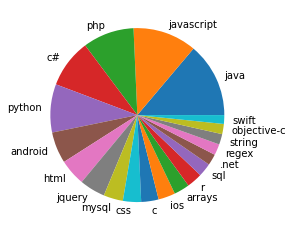

In [258]:
import matplotlib.pyplot as plt
import numpy as np


plt.pie(ypie, labels = xpie)
plt.show()

9.Consider the first 500 tags and determine how many percentage of questions are been covered


In [39]:
#9
top500tags = toptags.nlargest(500, ['Frequency'])
top500tags

,Tags,Frequency
0,java,94846
1,javascript,81346
2,php,65333
3,c#,61899
4,python,61505
...,...,...
495,preg-match,438
496,background,437
497,itext,437
498,byte,436


In [44]:
taglist = top500tags.Tags.tolist()

In [173]:
#taglist

In [241]:
sumcnt=0
for i in range(len(dfpreprocess)):
  flag=0
  for j in range(500):
    if taglist[j] in dfpreprocess[i] and flag==0:
      sumcnt+=1
      flag=1
      break

In [242]:
per=(sumcnt*100)/len(dfpreprocess) 
print(per)

99.71606201678783


In [51]:
top5000tags = toptags.nlargest(5000, ['Frequency'])
top5000tags
taglist5000 = top5000tags.Tags.tolist()
print(taglist5000)

['java', 'javascript', 'php', 'c#', 'python', 'c++', 'android', 'html', 'jquery', 'mysql', 'css', 'c', 'ios', 'arrays', 'r', 'sql', '.net', 'regex', 'string', 'objective-c', 'swift', 'json', 'iphone', 'asp.net', 'sql-server', 'bash', 'python-3.x', 'node.js', 'linux', 'list', 'ajax', 'xml', 'ruby', 'asp.net-mvc', 'multithreading', 'swing', 'function', 'windows', 'database', 'date', 'mongodb', 'angularjs', 'html5', 'xcode', 'css3', 'matlab', 'pandas', 'python-2.7', 'eclipse', 'wpf', 'git', 'algorithm', 'winforms', 'shell', 'class', 'excel', 'c++11', 'oracle', 'ruby-on-rails', 'sorting', 'datetime', 'object', 'pointers', 'file', 'spring', 'oop', 'image', 'dataframe', 'variables', 'vb.net', 'linq', 'generics', 'jsf', 'firebase', 'angular', 'numpy', 'django', 'loops', 'forms', 'sqlite', 'dictionary', 'scala', 'mysqli', 'performance', 'visual-studio', 'email', 'matplotlib', 'vba', 'jsp', 'apache-spark', 'for-loop', 'servlets', 'macos', 'if-statement', 'facebook', 'inheritance', 'postgresql',

In [251]:
sum=0
flag=0
for i in range(len(dfpreprocess)):
  for j in range(5000):
    if taglist5000[j] in dfpreprocess[i] and flag==0:
      sum=sum+1
      flag=1

KeyboardInterrupt: ignored